In [23]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [24]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [25]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [26]:
%matplotlib inline

In [27]:
%store -r X_footsteps_continuous_absolute
%store -r Y_footsteps_continuous_absolute
print(X_footsteps_continuous_absolute.shape)
print(Y_footsteps_continuous_absolute.shape)

(762, 26)
(762, 4)


# Multivariate Linear Regression (Foot prediction)

In [28]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
# Entries where FL/RR are swinging
idxs = np.where(X_footsteps_continuous_absolute[:, -1] == 0)[0]
X_footsteps_continuous_absolute_RR_swing = X_footsteps_continuous_absolute[idxs]
Y_footsteps_continuous_absolute_RR_swing = Y_footsteps_continuous_absolute[idxs]

In [30]:
print("Percentage of footstep where FL and RR are swinging: ", len(idxs)/len(X_footsteps_continuous_absolute) * 100)

Percentage of footstep where FL and RR are swinging:  50.0


## Predict RR foot -> x

### Linear Regression

In [35]:
# Input
X = np.hstack((X_footsteps_continuous_absolute_RR_swing[:, :3], # motion command
               X_footsteps_continuous_absolute_RR_swing[:, 3:9],
               X_footsteps_continuous_absolute_RR_swing[:, 9:11], # FL (x,y) position
               X_footsteps_continuous_absolute_RR_swing[:, 12:14], # FR (x,y) position
               X_footsteps_continuous_absolute_RR_swing[:, 15:17], # RL (x,y) position
               X_footsteps_continuous_absolute_RR_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_footsteps_continuous_absolute_RR_swing[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rr_relative_swinging_x = LinearRegression()

# Fit the model
model_rr_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9994680353633963
RMSE:  0.0019281711617749233
The lowest error is:  6.833112232856875e-05
The highest error is:  0.0070983792386887234
The avg. error is:  0.001427732235880262


In [36]:
model_rr_relative_swinging_x.coef_

array([[ 2.92987596e-01, -5.55111512e-17, -3.22658567e-16,
         6.40695830e-02, -1.17860937e-01, -3.77764563e-03,
         5.59686141e-03, -2.66608954e-02, -5.16267313e-02,
        -2.12419992e-01,  2.54321125e-01,  4.23831014e-02,
        -2.50443599e-01, -7.35417359e-01, -1.11033689e-03,
         5.60298277e-01,  7.21198687e-01]])

In [37]:
model_rr_relative_swinging_x.intercept_

array([0.02166979])

Text(0, 0.5, 'Predictions')

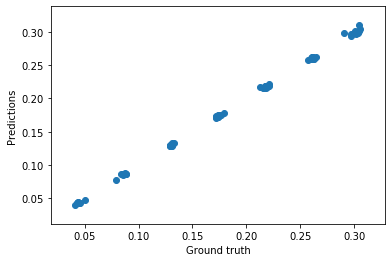

In [38]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [39]:
#%store model_rr_relative_swinging_x

In [40]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [41]:
# Save model
#joblib.dump(model_rr_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_swinging_x.sav")

### Predict RR foot -> y

In [42]:
# Input
X = np.hstack((X_footsteps_continuous_absolute_RR_swing[:, :3], # motion command
               X_footsteps_continuous_absolute_RR_swing[:, 3:9],
               X_footsteps_continuous_absolute_RR_swing[:, 9:11], # FL (x,y) position
               X_footsteps_continuous_absolute_RR_swing[:, 12:14], # FR (x,y) position
               X_footsteps_continuous_absolute_RR_swing[:, 15:17], # RL (x,y) position
               X_footsteps_continuous_absolute_RR_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_footsteps_continuous_absolute_RR_swing[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rr_relative_swinging_y = LinearRegression()

# Fit the model
model_rr_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.770069332688233
RMSE:  0.0008727610874951443
The lowest error is:  5.967131932849146e-06
The highest error is:  0.003319936934754176
The avg. error is:  0.0006146361603036982


In [43]:
model_rr_relative_swinging_y.coef_

array([[ 5.29045978e-02,  1.38777878e-17,  6.52256027e-16,
        -6.88764165e-02,  2.88670783e-01,  2.19864507e-02,
        -4.23788580e-03,  1.15637127e-02,  6.05532349e-02,
         3.72484728e-01, -2.72046224e-01, -1.47500155e-02,
         1.95762845e-02, -3.40988320e-03, -6.17378591e-01,
        -8.39475532e-02, -3.14366390e-01]])

In [44]:
model_rr_relative_swinging_y.intercept_

array([-0.03497082])

Text(0, 0.5, 'Predictions')

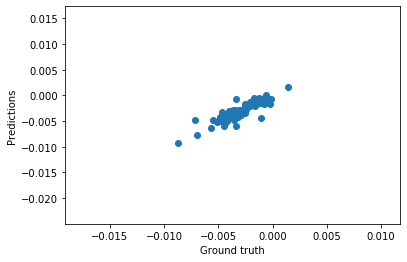

In [45]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [21]:
#%store model_rr_relative_swinging_y

In [23]:
#for idx, prediction in enumerate(predictions):
#    print(f'Input: {X_test[idx]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [24]:
# Save model
#joblib.dump(model_rr_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_swinging_y.sav")